In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import ml_metrics as metrics
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
!dir

 ’®¬ ў гбва®©бвўҐ C ­Ґ Ё¬ҐҐв ¬ҐвЄЁ.
 ‘ҐаЁ©­л© ­®¬Ґа в®¬ : 7496-5BB4

 ‘®¤Ґа¦Ё¬®Ґ Ї ЇЄЁ C:\projects\LP_DS_project

27.10.2020  19:11    <DIR>          .
27.10.2020  19:11    <DIR>          ..
27.10.2020  19:11    <DIR>          .ipynb_checkpoints
27.10.2020  18:44           116я198 AFKS.csv
27.10.2020  06:33    <DIR>          env
27.10.2020  19:11            12я479 Filling data.ipynb
27.10.2020  18:44           116я505 GAZP.csv
27.10.2020  19:04           430я192 Gazprom.ipynb
27.10.2020  18:44           417я252 Grafic_akcii.ipynb
27.10.2020  19:11           430я302 Kamaz.ipynb
27.10.2020  18:44           108я755 KMAZ.csv
27.10.2020  18:44           183я007 qAFKS.csv
27.10.2020  18:44           190я932 qGAZP.csv
27.10.2020  19:10           180я626 qKMAZ.csv
27.10.2020  18:44           113я422 SBER.csv
27.10.2020  18:44           117я504 TATN.csv
27.10.2020  18:54            12я446 week_AFSK.csv
27.10.2020  18:44            60я803 YNDX.csv
              14 д ©«®ў      2я490я423 Ў ©в
    

In [3]:
dataset = pd.read_csv('qKMAZ.csv', sep=';')
dataset

,Unnamed: 0,Unnamed: 0.1,COMPANY,DATE,OPEN,CLOSE
0,0,41673,KMAZ,2008-01-10,131.62,142.99
1,1,41674,KMAZ,2008-01-11,145.00,144.19
2,2,41674,KMAZ,2008-01-12,145.00,144.19
3,3,41674,KMAZ,2008-01-13,145.00,144.19
4,4,41675,KMAZ,2008-01-14,142.70,152.00
...,...,...,...,...,...,...
4642,4642,44860,KMAZ,2020-09-25,61.50,60.60
4643,4643,44860,KMAZ,2020-09-26,61.50,60.60
4644,4644,44860,KMAZ,2020-09-27,61.50,60.60
4645,4645,44861,KMAZ,2020-09-28,60.90,59.90


In [4]:
dataset['DATE']

0       2008-01-10
1       2008-01-11
2       2008-01-12
3       2008-01-13
4       2008-01-14
           ...    
4642    2020-09-25
4643    2020-09-26
4644    2020-09-27
4645    2020-09-28
4646    2020-09-29
Name: DATE, Length: 4647, dtype: object

In [5]:
dataset = pd.read_csv('qKMAZ.csv', ';', index_col=['DATE'], parse_dates=['DATE'], dayfirst=True)

In [6]:
dataset2 = dataset
dataset2

,Unnamed: 0,Unnamed: 0.1,COMPANY,OPEN,CLOSE
DATE,,,,,
2008-01-10,0,41673,KMAZ,131.62,142.99
2008-01-11,1,41674,KMAZ,145.00,144.19
2008-01-12,2,41674,KMAZ,145.00,144.19
2008-01-13,3,41674,KMAZ,145.00,144.19
2008-01-14,4,41675,KMAZ,142.70,152.00
...,...,...,...,...,...
2020-09-25,4642,44860,KMAZ,61.50,60.60
2020-09-26,4643,44860,KMAZ,61.50,60.60
2020-09-27,4644,44860,KMAZ,61.50,60.60


In [7]:
#Оставлю эту ячейку здесь
#dataset2 = dataset2[(dataset2['DATE'] > '2014-01-01') & (dataset2['DATE'] < '2020-09-30')]
#dataset2

## Избавляемся от ненужных столбцов

In [8]:
dataset2 = dataset2.drop(['COMPANY'], axis=1)

In [9]:
dataset2 = dataset2.drop(['CLOSE'], axis=1)

In [10]:
dataset2 = dataset2.drop(['Unnamed: 0'], axis=1)

In [11]:
dataset2 = dataset2.drop(['Unnamed: 0.1'], axis=1)

In [12]:
dataset2

,OPEN
DATE,
2008-01-10,131.62
2008-01-11,145.00
2008-01-12,145.00
2008-01-13,145.00
2008-01-14,142.70
...,...
2020-09-25,61.50
2020-09-26,61.50
2020-09-27,61.50


# Строим график

In [13]:
dtst = dataset2

<AxesSubplot:xlabel='DATE'>

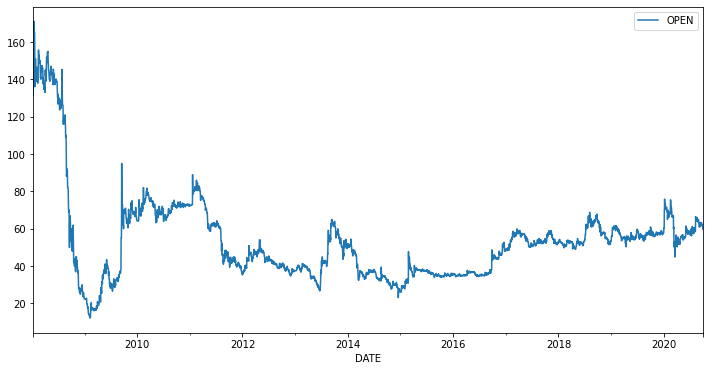

In [14]:
dtst.plot(figsize=(12,6))

### Данные с недельным интервалом

<AxesSubplot:xlabel='DATE'>

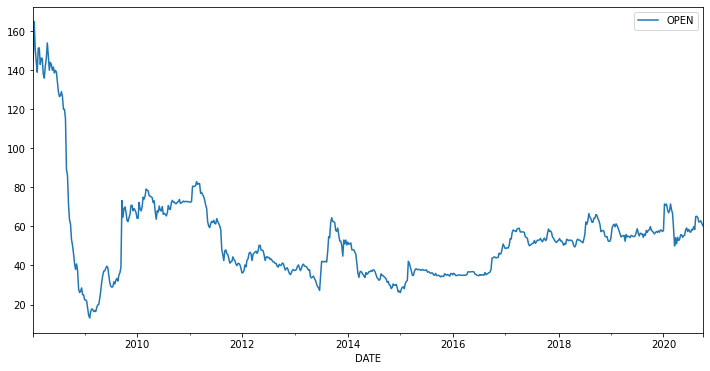

In [15]:
dtstw = dtst.resample('W').median()
dtstw.plot(figsize=(12,6))

In [16]:
dtstw

,OPEN
DATE,
2008-01-13,145.00
2008-01-20,165.00
2008-01-27,151.00
2008-02-03,144.45
2008-02-10,139.01
...,...
2020-09-06,62.30
2020-09-13,62.40
2020-09-20,62.90


In [17]:
dtstw.to_csv('week_qKMAZ.csv', sep=';')

### Гистограмма с полными данными

,OPEN
count,4647.000000
mean,53.605119
std,24.116396
min,12.250000
25%,37.105000
50%,51.600000
75%,61.000000
max,171.000000


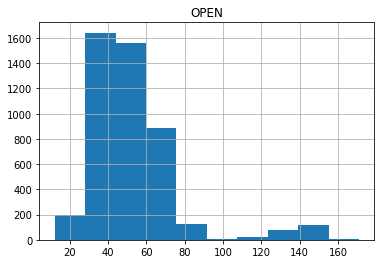

In [18]:
idtst = dtst.describe()
dtst.hist()
idtst

### Гистограмма с недельным интервалом

,OPEN
count,665.000000
mean,53.644045
std,24.219705
min,13.100000
25%,37.140000
50%,51.450000
75%,61.300000
max,165.000000


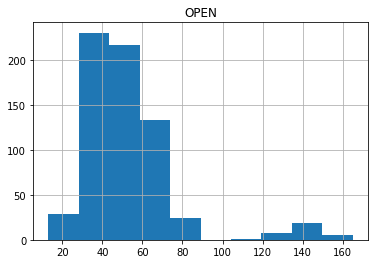

In [19]:
idtstw = dtstw.describe()
dtstw.hist()
idtstw

# Расчет коэффициента вариации

### Полные данные

In [20]:
V = idtst.loc['std']/idtst.loc['mean']

In [21]:
V

OPEN    0.44989
dtype: float64

### Недельные данные

In [22]:
Vw = idtstw.loc['std']/idtstw.loc['mean']

In [23]:
Vw

OPEN    0.451489
dtype: float64

# Тест Харки-Бера

### Полные данные

In [24]:
row =  [u'JB', u'p-value', u'skew', u'kurtosis']
jb_test = sm.stats.stattools.jarque_bera(dtst, axis=1)
jb_test

(array([0.375, 0.375, 0.375, ..., 0.375, 0.375, 0.375]),
 array([0.82902912, 0.82902912, 0.82902912, ..., 0.82902912, 0.82902912,
        0.82902912]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [25]:
a = np.vstack([jb_test])
a

array([[0.375     , 0.375     , 0.375     , ..., 0.375     , 0.375     ,
        0.375     ],
       [0.82902912, 0.82902912, 0.82902912, ..., 0.82902912, 0.82902912,
        0.82902912],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [26]:
idtst = SimpleTable(a, row)
idtst

JB,p-value,skew,kurtosis
0.375,0.375,0.375,0.375
0.8290291181804004,0.8290291181804004,0.8290291181804004,0.8290291181804004
0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0


### Недельные данные


In [27]:
roww =  [u'JB', u'p-value', u'skew', u'kurtosis']
jb_testw = sm.stats.stattools.jarque_bera(dtstw, axis=1)
jb_testw

(array([0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
      

In [28]:
aw = np.vstack([jb_testw])
aw

array([[0.375     , 0.375     , 0.375     , ..., 0.375     , 0.375     ,
        0.375     ],
       [0.82902912, 0.82902912, 0.82902912, ..., 0.82902912, 0.82902912,
        0.82902912],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [29]:
idtstw = SimpleTable(aw, roww)
idtstw

JB,p-value,skew,kurtosis
0.375,0.375,0.375,0.375
0.8290291181804004,0.8290291181804004,0.8290291181804004,0.8290291181804004
0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0


### Тест Дикки-Фуллера

### Полные данные

In [30]:
dtst2 = dtst.dropna(how='any')

In [31]:
dtst2

,OPEN
DATE,
2008-01-10,131.62
2008-01-11,145.00
2008-01-12,145.00
2008-01-13,145.00
2008-01-14,142.70
...,...
2020-09-25,61.50
2020-09-26,61.50
2020-09-27,61.50


In [32]:
test = sm.tsa.adfuller(dtst2)

In [33]:
test_result = [{'adf: ': test[0], 'p-value: ': test[1], 'Critical values: ': test[4]}]
test_result = pd.DataFrame(test_result)
if test[0] > test[4]['5%']:
    test_result[3] = 'есть единичные корни, ряд не стационарен'
else: 
    test_result[3] = 'единичных корней нет, ряд стационарен'

In [34]:
test_result

,adf:,p-value:,Critical values:,3
0,-3.702745,0.004075,"{'1%': -3.431767448052371, '5%': -2.8621663472...","единичных корней нет, ряд стационарен"


### Недельные данные

In [35]:
dtst2w = dtstw.dropna(how='any')

In [36]:
dtst2w

,OPEN
DATE,
2008-01-13,145.00
2008-01-20,165.00
2008-01-27,151.00
2008-02-03,144.45
2008-02-10,139.01
...,...
2020-09-06,62.30
2020-09-13,62.40
2020-09-20,62.90


In [37]:
testw = sm.tsa.adfuller(dtst2w)

In [38]:
test_resultw = [{'adf: ': test[0], 'p-value: ': testw[1], 'Critical values: ': test[4]}]
test_resultw = pd.DataFrame(test_resultw)
if testw[0] > testw[4]['5%']:
    test_resultw[3] = 'есть единичные корни, ряд не стационарен'
else: 
    test_resultw[3] = 'единичных корней нет, ряд стационарен'

In [39]:
test_resultw

,adf:,p-value:,Critical values:,3
0,-3.702745,0.000094,"{'1%': -3.431767448052371, '5%': -2.8621663472...","единичных корней нет, ряд стационарен"


### Проверка порядка интегрированного ряда

### Полные данные

In [40]:
dtst2diff = dtst.diff(periods=1).dropna()

In [41]:
test2 = sm.tsa.adfuller(dtst2diff)

In [42]:
test_result2 = [{'adf: ': test2[0], 'p-value: ': test2[1], 'Critical values: ': test2[4]}]
test_result2 = pd.DataFrame(test_result2)
if test2[0] > test2[4]['5%']:
    test_result2[3] = 'есть единичные корни, ряд не стационарен'
else: 
    test_result2[3] = 'единичных корней нет, ряд стационарен'

In [43]:
test_result2

,adf:,p-value:,Critical values:,3
0,-12.095828,2.071758e-22,"{'1%': -3.431765913496418, '5%': -2.8621656693...","единичных корней нет, ряд стационарен"


### Недельные данные

In [44]:
dtst2diffw = dtstw.diff(periods=1).dropna()

In [45]:
test2w = sm.tsa.adfuller(dtst2diffw)

In [46]:
test_result2w = [{'adf: ': test2w[0], 'p-value: ': test2w[1], 'Critical values: ': test2w[4]}]
test_result2w = pd.DataFrame(test_result2w)
if test2w[0] > test2w[4]['5%']:
    test_result2w[3] = 'есть единичные корни, ряд не стационарен'
else: 
    test_result2w[3] = 'единичных корней нет, ряд стационарен'

In [47]:
test_result2w

,adf:,p-value:,Critical values:,3
0,-12.35224,5.790512e-23,"{'1%': -3.4402817347322583, '5%': -2.865922446...","единичных корней нет, ряд стационарен"


### Проверка мат ожидания

In [48]:
#dt2diff.index[len(dt2diff.index)/3]

In [49]:
#m = dt2diff.index[len(dt2diff.index)/2+1]

In [50]:
"""r1 = sm.stats.DescrStatsW(dt2diff[m:])
r2 = sm.stats.DescrStatsW(dt2diff[:m])
prov = sm.stats.CompareMeans(r1,r2).ttest_ind()[1]
prov"""

'r1 = sm.stats.DescrStatsW(dt2diff[m:])\nr2 = sm.stats.DescrStatsW(dt2diff[:m])\nprov = sm.stats.CompareMeans(r1,r2).ttest_ind()[1]\nprov'

### Полные данные

<AxesSubplot:xlabel='DATE'>

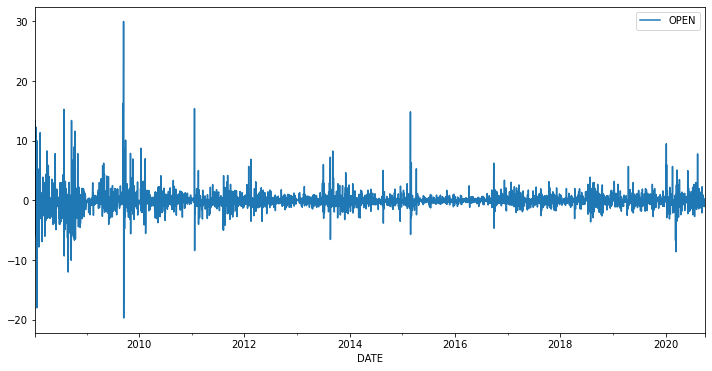

In [51]:
dtst2diff.plot(figsize=(12,6))

<Figure size 864x576 with 0 Axes>

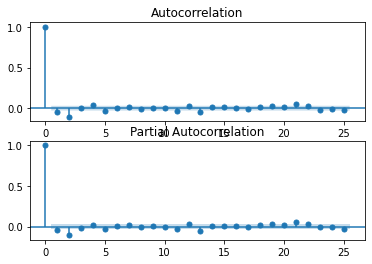

In [52]:
ig = plt.figure(figsize=(12,8))
fig = plt.figure() #добавил эту строку,так как без неё не запускается ячейка
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dtst2diff.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dtst2diff, lags=25, ax=ax2)

### Недельные данные

<AxesSubplot:xlabel='DATE'>

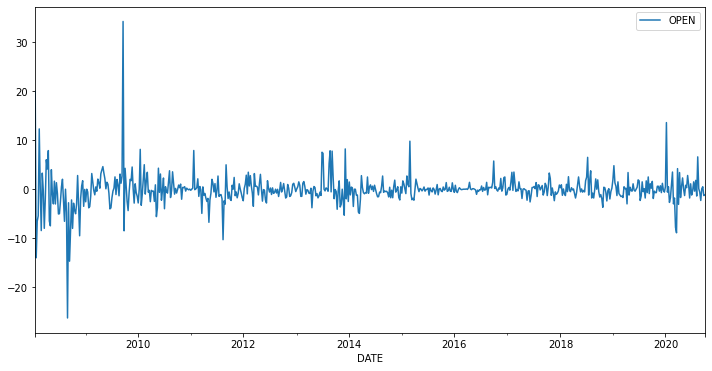

In [53]:
dtst2diffw.plot(figsize=(12,6))

<Figure size 864x576 with 0 Axes>

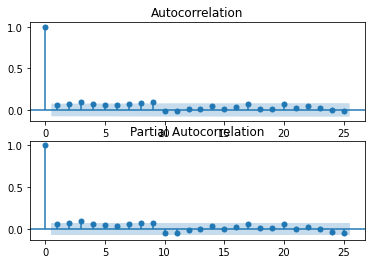

In [54]:
igw = plt.figure(figsize=(12,8))
fig = plt.figure() #добавил эту строку,так как без неё не запускается ячейка
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dtst2diffw.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dtst2diffw, lags=25, ax=ax2)

После изучения коррелограммы PACF можно сделать вывод, что p = 1, т.к. на ней только 1 лаг сильно отличнен от нуля. По коррелограмме ACF можно увидеть, что q = 1, т.к. после лага 1 значении функций резко падают

### Построение ARIMA модели

### Недельные данные

In [55]:
src_data_modelw = dtstw['2020-01-01':'2020-09-29']
modelw =  sm.tsa.arima.ARIMA(src_data_modelw, order=(1,1,1), freq='W').fit()
# в методе fit() пришлось удалить все параметры, так как они не подходят 
#(нет в документации)

c:\projects\ds_lessons\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\projects\ds_lessons\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [56]:
modelw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   OPEN   No. Observations:                   39
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -102.162
Date:                Tue, 27 Oct 2020   AIC                            210.324
Time:                        19:12:38   BIC                            215.237
Sample:                    01-05-2020   HQIC                           212.072
                         - 09-27-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6521      1.383     -0.471      0.637      -3.363       2.059
ma.L1          0.5744      1.475      0.389      0.697      -2.317       3.466
sigma2        12.6628      1.608      7.877      0.000       9.512      15.814
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                39.87
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                             0.78
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Полные данные (модель не строится)

In [57]:
src_data_model = dtst['2014-01-01':'2020-09-30']
model =  sm.tsa.arima.ARIMA(src_data_model, order=(1,1,1), freq='D').fit()
# в методе fit() пришлось удалить все параметры, так как они не подходят 
#(нет в документации)

c:\projects\ds_lessons\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   OPEN   No. Observations:                 2464
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3334.365
Date:                Tue, 27 Oct 2020   AIC                           6674.731
Time:                        19:12:38   BIC                           6692.158
Sample:                    01-01-2014   HQIC                          6681.062
                         - 09-29-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4958      0.071      7.009      0.000       0.357       0.634
ma.L1         -0.5993      0.065     -9.170      0.000      -0.727      -0.471
sigma2         0.8778      0.005    161.457      0.000       0.867       0.888
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):            193427.60
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.79   Skew:                             2.63
Prob(H) (two-sided):                  0.00   Kurtosis:                        46.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Q-тест Льюинга-Бокса

In [59]:
type(model.resid)

pandas.core.series.Series

In [60]:
q_test = sm.tsa.stattools.acf(model.resid, qstat=True)

c:\projects\ds_lessons\env\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
c:\projects\ds_lessons\env\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [61]:
q_test

(array([ 1.00000000e+00,  1.51866650e-03, -3.97208920e-03,  2.22179795e-03,
        -4.09653198e-03, -2.70750421e-02,  2.56258871e-02, -1.98890400e-03,
        -8.90903832e-03,  6.45411215e-03, -4.93644299e-03,  9.35762188e-03,
         4.79681771e-03, -8.85220116e-03, -5.34374733e-03,  1.37321020e-02,
        -2.79220937e-03,  8.56521571e-03,  7.31013547e-03,  4.75187582e-03,
        -9.70036689e-03,  1.20347499e-02, -1.60632682e-02, -4.41659126e-03,
        -1.16801205e-02, -9.16548323e-03, -8.59540720e-03, -1.65116491e-02,
        -2.33068239e-02, -1.11410802e-02, -2.67310743e-02,  6.07190225e-03,
        -1.57581242e-03, -1.09264211e-02,  7.56752474e-04,  1.97510124e-02,
         1.39151201e-02,  3.59774321e-03, -6.03412205e-03,  1.05595674e-02,
        -1.13827156e-02]),
 array([5.68976315e-03, 4.46286662e-02, 5.68166337e-02, 9.82672858e-02,
        1.90966380e+00, 3.53300465e+00, 3.54278729e+00, 3.73915364e+00,
        3.84225284e+00, 3.90259036e+00, 4.11949419e+00, 4.17651321e+0

In [62]:
pd.DataFrame({'Q-stat':q_test[1], 'p-value':q_test[2]})

,Q-stat,p-value
0,0.005690,0.939872
1,0.044629,0.977933
2,0.056817,0.996459
3,0.098267,0.998832
4,1.909664,0.861498
5,3.533005,0.739574
6,3.542787,0.830673
7,3.739154,0.879858
8,3.842253,0.921485
9,3.902590,0.951634


### Рассчет коэффициента детерминации

In [63]:
pred = model.predict('2020-09-30','2020-10-15', typ='levels')

In [74]:
trn = dtst['2020-09-14':]

In [75]:
trn.shape

(16, 1)

In [76]:
pred.shape

(16, 1)

In [77]:
pred

,OPEN
2020-09-30,60.049339
2020-10-01,60.123386
2020-10-02,60.160101
2020-10-03,60.178305
2020-10-04,60.187332
2020-10-05,60.191807
2020-10-06,60.194026
2020-10-07,60.195127
2020-10-08,60.195672
2020-10-09,60.195943


In [78]:
pred = pred.to_frame()


AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [79]:
pred.shape

(16, 1)

In [80]:
pred

,OPEN
2020-09-30,60.049339
2020-10-01,60.123386
2020-10-02,60.160101
2020-10-03,60.178305
2020-10-04,60.187332
2020-10-05,60.191807
2020-10-06,60.194026
2020-10-07,60.195127
2020-10-08,60.195672
2020-10-09,60.195943


In [81]:
pred.rename(columns={'predicted_mean': 'OPEN'}, inplace=True)

In [82]:
trn

,OPEN
DATE,
2020-09-14,62.7
2020-09-15,62.5
2020-09-16,62.9
2020-09-17,62.4
2020-09-18,63.3
2020-09-19,63.3
2020-09-20,63.3
2020-09-21,63.0
2020-09-22,62.0


In [83]:
r2 = r2_score(trn, pred)

In [84]:
r2

-4.531594856908912

In [85]:
metrics.rmse(trn,pred)

2.198264473289728

In [86]:
metrics.mae(trn,pred)

2.021523573651398

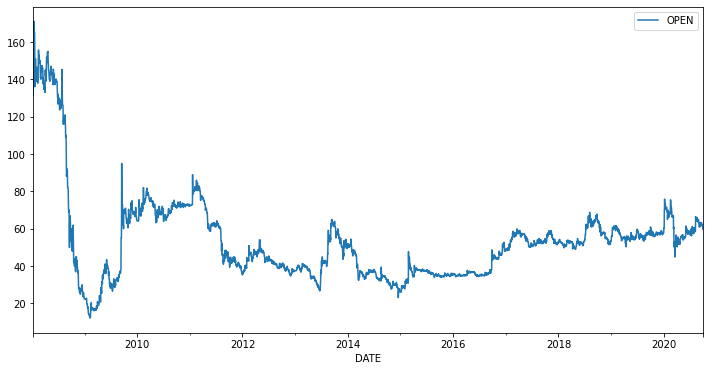

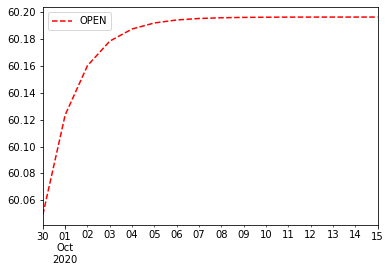

In [87]:
dtst.plot(figsize=(12,6))
pred.plot(style='r--')
plt.show()

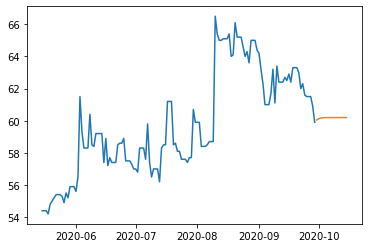

In [88]:
plt.plot(dtst['2020-05-15':])
plt.plot(pred)
plt.show()